# Import and Clean Data

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Import
df_raw = pd.read_csv('APD_Use_of_Force.csv')
df_raw

#Clean (SOME OTHER CLEANING MAY BE NECESSARY)
#some of the street names have typos for example ('400K E 6TH ST' in row 19225)
df = df_raw.drop_duplicates()

#drop rows with missing subjects
df['Subject Sex'].replace('-', np.nan, inplace=True)
df['Subject Race/Ethnicity'].replace('-', np.nan, inplace=True)
df['Subject Race/Ethnicity'].replace('Unknown', np.nan, inplace=True)
df['Subject Role'].replace('-', np.nan, inplace=True)

df.dropna(subset=['Subject Sex', 'Subject Race/Ethnicity', 'Subject Role'], how='all', inplace=True)

df

<ipython-input-2-07e7b47b9675>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject Sex'].replace('-', np.nan, inplace=True)
<ipython-input-2-07e7b47b9675>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject Race/Ethnicity'].replace('-', np.nan, inplace=True)
<ipython-input-2-07e7b47b9675>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject Race/Ethnicity'].replace('Unknown', np.nan, inplace=True)
<ipython-

,Response to Resistance (R2R) Report ID,Case Report Number,Occurred Date,Occurred Time,Address,Zip Code,County,Council District,Sector,X Coordinate,...,Used Firearm(s),Used Impact Weapon(s),Used Taser(s),Used Canine(s),Used Chemical Agent(s),Used PIT(s),Used Weaponless,Highest Subject Injury by R2R,Highest Subject Injury by Subject,Officer Injury
0,2020104421250371AP7756,202010442,01/01/2020 12:00:00 AM,0156,309 E 6TH ST,78701.0,Travis County,9.0,George,3115174,...,0,0,0,0,1,0,0,6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain,No Complaint Of Injury/pain
1,202010098459887669AP8115,202010098,01/01/2020 12:00:00 AM,0018,404 E 6TH ST,78701.0,Travis County,9.0,George,3115542,...,0,0,0,0,0,0,1,6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain,No Complaint Of Injury/pain
2,202010098459887669AP8422,202010098,01/01/2020 12:00:00 AM,0018,404 E 6TH ST,78701.0,Travis County,9.0,George,3115542,...,0,0,0,0,0,0,1,6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain,No Complaint Of Injury/pain
3,202010098459887669AP8895,202010098,01/01/2020 12:00:00 AM,0020,404 E 6TH ST,78701.0,Travis County,9.0,George,3115542,...,0,0,0,0,0,0,1,6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain,-
4,202010203165103968AP8948,202010203,01/01/2020 12:00:00 AM,0047,1100 REINLI ST,78723.0,Travis County,4.0,Ida,3126350,...,0,0,0,0,0,0,1,6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain,No Complaint Of Injury/pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23579,2024321256459665471AP8215,2024321256,02/01/2024 12:00:00 AM,1942,5005 E PARMER LN,78653.0,Travis County,NaN,Out of City,3151000,...,0,0,0,0,0,0,1,5 - Complaint Of Injury/Pain But None Observed,5 - Complaint Of Injury/Pain But None Observed,-
23580,2024321256459665471AP8767,2024321256,02/01/2024 12:00:00 AM,-,5005 E PARMER LN,78653.0,Travis County,NaN,Out of City,3151000,...,0,0,0,0,0,0,0,6 - No Complaint Of Injury/Pain,5 - Complaint Of Injury/Pain But None Observed,No Complaint Of Injury/pain
24087,2024670571460299962AP6305,2024670571,03/07/2024 12:00:00 AM,1300,3001 COLONIAL PKWY,NaN,Other,NaN,-,0,...,0,0,0,0,0,0,0,4 - Complaint Of Injury/Pain,4 - Complaint Of Injury/Pain,No Complaint Of Injury/pain
24387,2024880942172032311AP6105,2024880942,03/28/2024 12:00:00 AM,-,780 BASTROP HWY SB,NaN,Other,NaN,Henry,3132918,...,0,0,0,0,0,0,0,6 - No Complaint Of Injury/Pain,4 - Complaint Of Injury/Pain,-


In [ ]:
df.shape

(22977, 43)

### 1. From 2020 onwards, how many responses to resistance have occurred on every unique street and what do the trends look like?


<ipython-input-4-9a5a1b5f20c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Occurred Date'].apply(extract_year)
<ipython-input-4-9a5a1b5f20c2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Street Name'] = df['Address'].apply(extract_street_name)


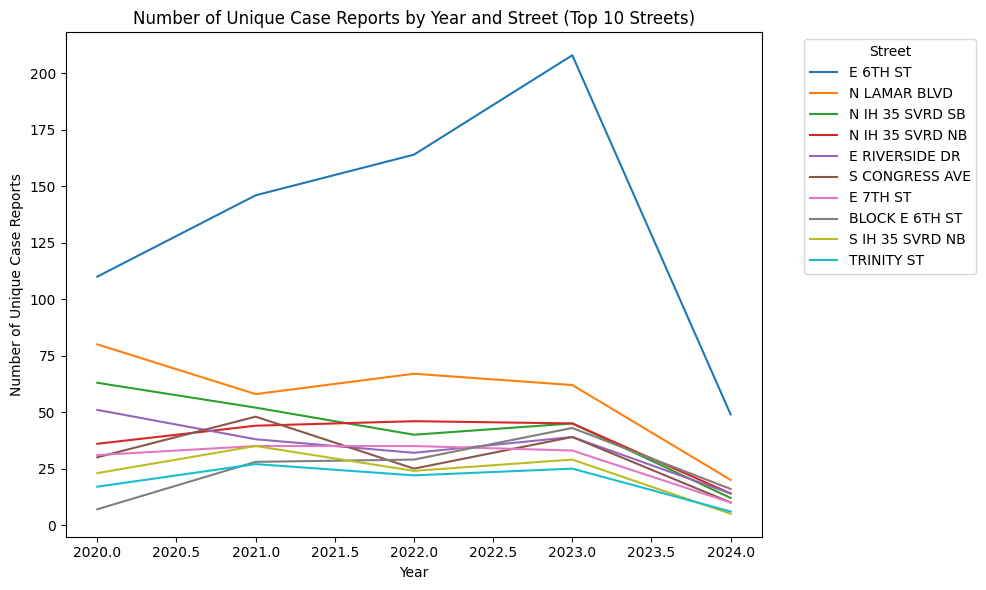

In [ ]:
def extract_year(date_string):
    return pd.to_datetime(date_string).year

def extract_street_name(address):
    import re
    pattern = r'^\d+\s+'
    match = re.match(pattern, address)
    if match:
        return re.sub(pattern, '', address)
    else:
        return address

df['Year'] = df['Occurred Date'].apply(extract_year)
df['Street Name'] = df['Address'].apply(extract_street_name)

grouped_df = df.groupby(['Street Name', 'Year', 'Case Report Number'])['Case Report Number'].count().groupby(['Street Name', 'Year']).count()

grouped_df = grouped_df.reset_index()
pivot_df = grouped_df.pivot(index='Street Name', columns='Year', values='Case Report Number')

top_10_streets = pivot_df.sum(axis=1).nlargest(10).index
pivot_df_top_10 = pivot_df.loc[top_10_streets]

plt.figure(figsize=(10, 6))

for index, row in pivot_df_top_10.iterrows():
    plt.plot(row.index, row.values, label=index)

plt.xlabel('Year')
plt.ylabel('Number of Unique Case Reports')
plt.title('Number of Unique Case Reports by Year and Street (Top 10 Streets)')
plt.legend(title='Street', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 2. What is the most common weapon used for these use of force instances?

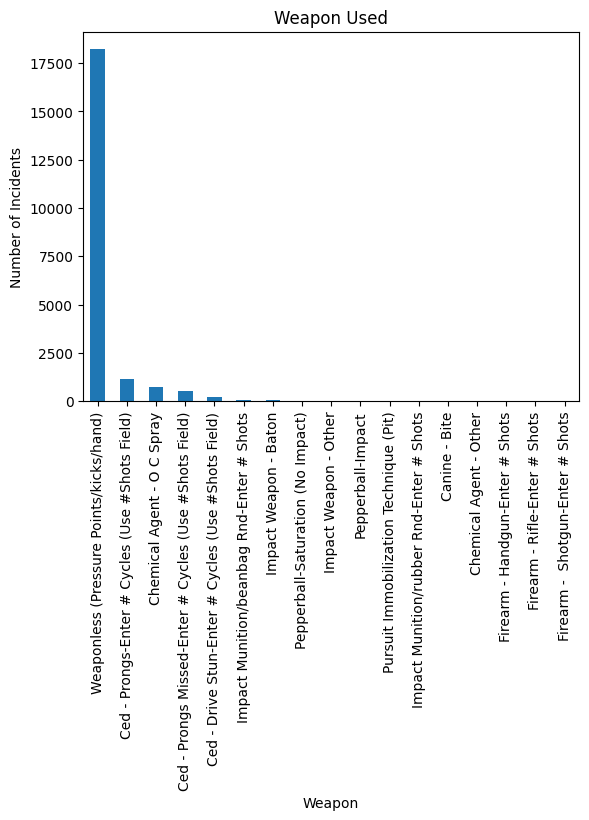

In [ ]:
# remove missing values
mask = (df['Weapon Used 1'] == '-')
df.loc[mask, 'Weapon Used 1'] = np.nan

# plot for weapon used
weapons_vc = df['Weapon Used 1'].value_counts().plot(kind="bar")
plt.title('Weapon Used')
plt.xlabel('Weapon')
plt.ylabel('Number of Incidents')
plt.show()

### 3. Predict force level on all relevant regressors.

In [ ]:
# prepare the data
df.dropna(subset=['Force Level', 'Subject Sex', 'Subject Race/Ethnicity'], inplace=True)
df['Highest Force Level by R2R'] = df['Highest Force Level by R2R'].replace('Other Force Level', 'Level 0')
df['Force Level'] = df['Highest Force Level by R2R'].str[-1].astype(int)

y, X = dmatrices('Q("Force Level") ~ Q("Subject Sex") + Q("Subject Race/Ethnicity") + Q("Subject Role") + Q("Nature of Contact") + \
                  Q("Reason for Use of Force") + Q("Highest Subject Resistance by Subject") + Q("Officer Years of Service") + \
                  + Q("Officer Organization")',
                 data=df,
                 return_type='dataframe')

X[:3]

<ipython-input-6-9d30ee1e8af0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Force Level', 'Subject Sex', 'Subject Race/Ethnicity'], inplace=True)
<ipython-input-6-9d30ee1e8af0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highest Force Level by R2R'] = df['Highest Force Level by R2R'].replace('Other Force Level', 'Level 0')
<ipython-input-6-9d30ee1e8af0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Intercept,"Q(""Subject Sex"")[T.M]","Q(""Subject Sex"")[T.U]","Q(""Subject Sex"")[T.X]","Q(""Subject Race/Ethnicity"")[T.Asian]","Q(""Subject Race/Ethnicity"")[T.Black]","Q(""Subject Race/Ethnicity"")[T.Hawaiian]","Q(""Subject Race/Ethnicity"")[T.Hispanic]","Q(""Subject Race/Ethnicity"")[T.Middle Eastern]","Q(""Subject Race/Ethnicity"")[T.White]",...,"Q(""Officer Organization"")[T.STREET NARCOTICS TEAM 2 OCD]","Q(""Officer Organization"")[T.SWAT SPECIAL OPERATIONS]","Q(""Officer Organization"")[T.TACTICAL INTEL UNIT]","Q(""Officer Organization"")[T.VEHICLE ABATEMENT HWY ENFORCEMENT]","Q(""Officer Organization"")[T.VEHICULAR HOMICIDE HWY ENFORCEMENT]","Q(""Officer Organization"")[T.VIOLENT CRIME INTERDICTION UNIT]","Q(""Officer Organization"")[T.VIOLENT CRIMES TASK FORCE]","Q(""Officer Organization"")[T.WHITE COLLAR CRIME PROP CRIMES]","Q(""Officer Organization"")[T.WRECKER HWY ENFORCEMENT]","Q(""Officer Years of Service"")"
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Force Level")   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     11.19
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        05:35:19   Log-Likelihood:                -19767.
No. Observations:               22090   AIC:                         4.004e+04
Df Residuals:                   21835   BIC:                         4.209e+04
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
result.rsquared

0.1152023234615619

In [ ]:
result.pvalues

Intercept                                                       6.642127e-149
Q("Subject Sex")[T.M]                                            1.426541e-72
Q("Subject Sex")[T.U]                                            4.308695e-01
Q("Subject Sex")[T.X]                                            7.186502e-01
Q("Subject Race/Ethnicity")[T.Asian]                             4.763716e-01
                                                                    ...      
Q("Officer Organization")[T.VIOLENT CRIME INTERDICTION UNIT]     9.467860e-01
Q("Officer Organization")[T.VIOLENT CRIMES TASK FORCE]           4.600494e-03
Q("Officer Organization")[T.WHITE COLLAR CRIME PROP CRIMES]      5.914478e-01
Q("Officer Organization")[T.WRECKER HWY ENFORCEMENT]             2.035128e-01
Q("Officer Years of Service")                                    8.540807e-02
Length: 255, dtype: float64

In [ ]:
significance_level = 0.05

significant_pvalues = result.pvalues[result.pvalues < significance_level]

significant_pvalues = significant_pvalues.sort_values()


# Print the significant p-values
print("Significant p-values:")
print(significant_pvalues)


Significant p-values:
Intercept                                                                          6.642127e-149
Q("Subject Sex")[T.M]                                                               1.426541e-72
Q("Reason for Use of Force")[T.In Custody, Maintaining Control]                     5.748673e-67
Q("Subject Role")[T.DECEASED]                                                       9.515285e-18
Q("Reason for Use of Force")[T.Necessary To Immobilize A Vehicle Pursuit (Pit)]     8.747721e-16
                                                                                       ...      
Q("Officer Organization")[T.GEORGE 200 REG I DAYS]                                  4.454625e-02
Q("Officer Organization")[T.MOUNTED PATROL]                                         4.458036e-02
Q("Reason for Use of Force")[T.Other (Document In Supplement)]                      4.766101e-02
Q("Officer Organization")[T.LAKE PATROL 1]                                          4.821281e-02
Q("Offic

In [ ]:
significance_level = 0.05

significant_pvalues = result.pvalues[result.pvalues > significance_level]

significant_pvalues = significant_pvalues.sort_values()


# Print the significant p-values
print("Significant p-values:")
print(significant_pvalues)


Significant p-values:
Q("Officer Organization")[T.CID TEAM 4 PROPERTY]              0.053139
Q("Officer Organization")[T.EDWARD 300 REG II PATROL]         0.056437
Q("Officer Organization")[T.ADAM 400 REG II PATROL]           0.058235
Q("Subject Race/Ethnicity")[T.Middle Eastern]                 0.062180
Q("Officer Organization")[T.AIRPORT INVESTIGATIONS REG II]    0.070785
                                                                ...   
Q("Officer Organization")[T.BAKER 300 REG I PATROL]           0.966928
Q("Subject Role")[T.JUV-RUNAWAY]                              0.973053
Q("Subject Role")[T.SUMMONS/CIT]                              0.984429
Q("Officer Organization")[T.SPECIAL INVESTIGATIONS]           0.986433
Q("Officer Organization")[T.SEX CRIMES]                       0.991013
Length: 189, dtype: float64


### 4. Is there a relationship between the force level used and the resistance by subject?

In [ ]:
resistance = df['Highest Subject Resistance by Subject']
df['Highest Subject Resistance by Subject'] = resistance.str[0].astype(int)
y, X = dmatrices('Q("Highest Subject Resistance by Subject") ~ + Q("Force Level")',
                 data=df,
                 return_type='dataframe')

X[:3]

<ipython-input-16-5e2265e504b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highest Subject Resistance by Subject'] = resistance.str[0].astype(int)


,Intercept,"Q(""Force Level"")"
1,1.0,4.0
2,1.0,3.0
3,1.0,4.0


In [ ]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Q("Highest Subject Resistance by Subject")   R-squared:                       0.002
Model:                                                    OLS   Adj. R-squared:                  0.002
Method:                                         Least Squares   F-statistic:                     39.02
Date:                                        Wed, 17 Apr 2024   Prob (F-statistic):           4.26e-10
Time:                                                05:41:22   Log-Likelihood:                -24774.
No. Observations:                                       22123   AIC:                         4.955e+04
Df Residuals:                                           22121   BIC:                         4.957e+04
Df Model:                                                   1                                         
Covariance Type:                                    nonrobust            

In [ ]:
result.rsquared

0.001761026297813606

In [ ]:
result.pvalues

Intercept           0.000000e+00
Q("Force Level")    4.261734e-10
dtype: float64

### 5. What are the common ethnicities of the victims?

In [ ]:
#creating subset dataframe with important statistics about the incidents and the subject's race
df_race = df[['Case Report Number', 'Subject ID', 'Subject Race/Ethnicity',
              'Subject Role', 'Reason for Use of Force',
              'Highest Subject Resistance by R2R', 'Highest Subject Resistance by Subject',
              'Highest Force Level by R2R', 'Weapon Used 1',
              'Highest Subject Injury by R2R', 'Highest Subject Injury by Subject']]

#filtering by only subject ID so that multiple subjects in one case report are captured
df_race = df_race.drop_duplicates(subset = 'Subject ID')
df_race[:2]

,Case Report Number,Subject ID,Subject Race/Ethnicity,Subject Role,Reason for Use of Force,Highest Subject Resistance by R2R,Highest Subject Resistance by Subject,Highest Force Level by R2R,Weapon Used 1,Highest Subject Injury by R2R,Highest Subject Injury by Subject
1,202010098,459887669: 202010098,Black,ARRESTED,Necessary To Effect Arrest / Detention,2 - Aggressive Resistance,2,Level 4,Weaponless (Pressure Points/kicks/hand),6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain
4,202010203,165103968: 202010203,Black,ARRESTED,"In Custody, Maintaining Control",3 - Defensive Resistance,3,Level 4,Weaponless (Pressure Points/kicks/hand),6 - No Complaint Of Injury/Pain,6 - No Complaint Of Injury/Pain


In [ ]:
#determining the value counts of all incidents by race
race_counts = df_race['Subject Race/Ethnicity'].value_counts()
race_counts

Subject Race/Ethnicity
Hispanic           3749
Black              3367
White              3206
Asian                89
Middle Eastern       42
American Indian      12
Hawaiian              6
Name: count, dtype: int64

<Axes: xlabel='Subject Race/Ethnicity'>

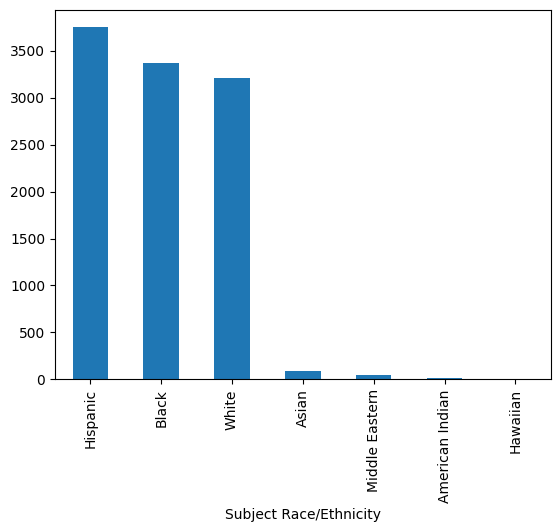

In [ ]:
#visualizing the above data
race_counts.plot(kind = 'bar')

### 6a. What are the common levels of resistance by each ethnicity?

In [ ]:
#cross tabulating all the races and their incident counts by highest resistance
race_resistance = pd.crosstab(df_race['Highest Subject Resistance by Subject'],
                            df_race['Subject Race/Ethnicity'])
race_resistance

Subject Race/Ethnicity,American Indian,Asian,Black,Hawaiian,Hispanic,Middle Eastern,White
Highest Subject Resistance by Subject,,,,,,,
1,0,1,42,0,49,2,43
2,3,28,981,1,1103,8,916
3,7,58,2183,5,2384,29,2064
4,1,1,42,0,57,0,56
5,1,1,52,0,70,2,65
6,0,0,7,0,14,0,14
7,0,0,60,0,72,1,48


### 6b. Which race is the most likely to resort to aggressive resistance?

In [ ]:
#normalizing the data
race_resistance_normalized = race_resistance / race_counts
race_resistance_normalized

#which race is the most likely to resort to aggressive resistance?
race_resistance_normalized.iloc[1].sort_values(ascending = False)

Subject Race/Ethnicity
Asian              0.314607
Hispanic           0.294212
Black              0.291357
White              0.285714
American Indian    0.250000
Middle Eastern     0.190476
Hawaiian           0.166667
Name: 2, dtype: float64

### 6c. Which race is the most likely to resort to deadly resistance?

In [ ]:
race_resistance_normalized.iloc[0].sort_values(ascending = False)

Subject Race/Ethnicity
Middle Eastern     0.047619
White              0.013412
Hispanic           0.013070
Black              0.012474
Asian              0.011236
American Indian    0.000000
Hawaiian           0.000000
Name: 1, dtype: float64

### 7. What is the common force level used by the police against each ethnicity? Is any specific race more likely to receive level 2 resistance by the officer?

In [ ]:
#cross tabulating all the races and their incident counts by highest resistance
race_force = pd.crosstab(df_race['Highest Force Level by R2R'],
                            df_race['Subject Race/Ethnicity'])
race_force

Subject Race/Ethnicity,American Indian,Asian,Black,Hawaiian,Hispanic,Middle Eastern,White
Highest Force Level by R2R,,,,,,,
Level 0,0,0,23,0,28,0,28
Level 1,0,0,5,0,8,0,2
Level 2,0,1,75,0,121,1,59
Level 3,5,39,1456,3,1643,12,1314
Level 4,7,49,1808,3,1949,29,1803


In [ ]:
#normalizing the data
race_force_normalized = race_force / race_counts
race_force_normalized

#is any race more likely to receive level 2 resistance by the officer?
race_force_normalized.iloc[1].sort_values(ascending = False)

Subject Race/Ethnicity
Hispanic           0.002134
Black              0.001485
White              0.000624
American Indian    0.000000
Asian              0.000000
Hawaiian           0.000000
Middle Eastern     0.000000
Name: Level 1, dtype: float64

### 8a. What is the level of injuries sustained by the victims (filtered by race)?

In [ ]:
#cross tabulating all the races and their incident counts by highest resistance
race_injury = pd.crosstab(df_race['Highest Subject Injury by Subject'],
                            df_race['Subject Race/Ethnicity'])
race_injury

Subject Race/Ethnicity,American Indian,Asian,Black,Hawaiian,Hispanic,Middle Eastern,White
Highest Subject Injury by Subject,,,,,,,
1 - Death,0,0,1,0,2,0,1
2 - Serious Injury,0,0,5,0,7,0,5
3 - Minor Injury,2,19,621,1,777,8,652
4 - Complaint Of Injury/Pain,2,7,395,0,447,3,372
5 - Complaint Of Injury/Pain But None Observed,1,6,314,0,279,3,256
6 - No Complaint Of Injury/Pain,7,57,2029,5,2232,28,1916
8 - None Reported,0,0,2,0,3,0,4
Unknown,0,0,0,0,2,0,0


### 8b. How many people have died due to police brutality since 2020? What ethnicity were they?

In [ ]:
race_injury.iloc[0].sort_values(ascending = False)

Subject Race/Ethnicity
Hispanic           2
Black              1
White              1
American Indian    0
Asian              0
Hawaiian           0
Middle Eastern     0
Name: 1 - Death, dtype: int64

In [ ]:
df[df['Highest Subject Injury by Subject'] == '1 - Death']\
                    [['Case Report Number', 'Occurred Date', 'Subject ID', 'Subject Sex',
                      'Subject Race/Ethnicity','Weapon Used 1']].drop_duplicates(subset = 'Subject ID')

,Case Report Number,Occurred Date,Subject ID,Subject Sex,Subject Race/Ethnicity,Weapon Used 1
1857,20201151176,04/24/2020 12:00:00 AM,288949835: 20201151176,M,Hispanic,Firearm - Rifle-Enter # Shots
5378,202150027,01/05/2021 12:00:00 AM,459272761: 202150027,M,Hispanic,Firearm - Handgun-Enter # Shots
5871,2021411020,02/10/2021 12:00:00 AM,459414906: 2021411020,M,Black,Firearm - Rifle-Enter # Shots
9801,20213000653,10/27/2021 12:00:00 AM,294325109: 20213000653,M,White,Impact Munition/rubber Rnd-Enter # Shots


### 8c. Is any race more likely to sustain minor injuries?

In [ ]:
#normalizing the data
race_injury_normalized = race_injury / race_counts
race_injury_normalized

#is any race more likely to receive minor injuries?
race_injury_normalized.iloc[2].sort_values(ascending = False)

Subject Race/Ethnicity
Asian              0.213483
Hispanic           0.207255
White              0.203369
Middle Eastern     0.190476
Black              0.184437
American Indian    0.166667
Hawaiian           0.166667
Name: 3 - Minor Injury, dtype: float64

### 8d. Is any race more likely to sustain serious injuries?

In [ ]:
race_injury_normalized.iloc[1].sort_values(ascending = False)

Subject Race/Ethnicity
Hispanic           0.001867
White              0.001560
Black              0.001485
American Indian    0.000000
Asian              0.000000
Hawaiian           0.000000
Middle Eastern     0.000000
Name: 2 - Serious Injury, dtype: float64

9. What is the split between men and women in the dataset?

In [ ]:
df.drop_duplicates(subset = 'Subject ID')['Subject Sex'].value_counts() \
    / len(df.drop_duplicates(subset = 'Subject ID'))

Subject Sex
M    0.716646
F    0.282877
X    0.000382
U    0.000096
Name: count, dtype: float64